In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mass_results = pd.read_csv('mass_results.csv')
mass_results = mass_results.dropna().reset_index(drop=True)
mass_results.drop(columns=['recording', 'experiment'], inplace=True)

In [3]:
# preview the data
mass_results.head()

,object,mass,volume,result,line_pair_1,line_pair_2,line_pair_3,line_pair_4,line_pair_5
0,small,18,30ml,pass,144.934878,101.209813,177.809221,109.487415,159.805444
1,small,18,30ml,pass,142.275644,94.448624,148.441774,141.477263,134.106593
2,small,18,30ml,pass,141.850482,94.988034,161.261984,141.512303,134.857544
3,small,32,30ml,pass,144.407277,100.445868,157.828448,110.957825,155.954467
4,small,32,30ml,pass,144.175424,99.239648,154.732961,135.742481,132.175272


In [4]:
angles_df = mass_results[['object'] + [line_pair for line_pair in mass_results.columns if 'line' in line_pair]]
angles_df.head()

,object,line_pair_1,line_pair_2,line_pair_3,line_pair_4,line_pair_5
0,small,144.934878,101.209813,177.809221,109.487415,159.805444
1,small,142.275644,94.448624,148.441774,141.477263,134.106593
2,small,141.850482,94.988034,161.261984,141.512303,134.857544
3,small,144.407277,100.445868,157.828448,110.957825,155.954467
4,small,144.175424,99.239648,154.732961,135.742481,132.175272


In [5]:
# average the angles for each object
average_angles = angles_df.groupby('object').mean()

# plot the angles for each object
average_angles

,line_pair_1,line_pair_2,line_pair_3,line_pair_4,line_pair_5
object,,,,,
large,143.136566,116.007315,162.657092,118.894501,153.715905
medium,143.943166,107.259658,176.549099,117.991653,148.422207
small,142.560105,107.800582,168.558581,118.773410,146.485952


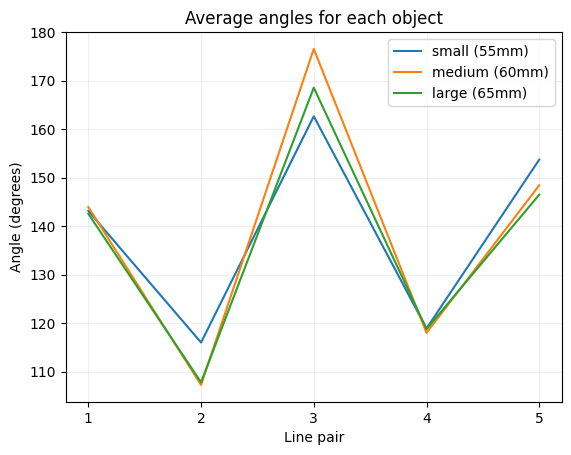

In [6]:
x = average_angles.columns
y = average_angles.values
objects = { 
    0: 'small (55mm)',
    1: 'medium (60mm)',
    2: 'large (65mm)'
}

for i in range(len(y)):
    plt.plot(x, y[i], label=f'{objects[i]}')

plt.legend()
plt.xticks(labels=['1', '2', '3', '4', '5'], ticks=['line_pair_1', 'line_pair_2', 'line_pair_3', 'line_pair_4', 'line_pair_5'])
plt.xlabel('Line pair')
plt.ylabel('Angle (degrees)')
plt.grid(alpha=0.2)
plt.title('Average angles for each object')
plt.show()

In [7]:
mass_results = pd.read_csv('max_mass_results.csv')
mass_results

,object,mass,result,line_pair_1,line_pair_2,line_pair_3,line_pair_4,line_pair_5
0,small,18,pass,143.020334,96.882157,162.504326,130.825660,142.923194
1,small,32,pass,143.916426,99.752920,157.984185,127.585925,140.015737
2,small,49,pass,144.521466,108.957373,155.722128,104.000908,154.838407
3,small,60,pass,143.440733,102.442058,178.177515,129.939693,141.725715
4,small,63,pass,145.119054,116.379177,177.860032,96.509782,153.469631
5,small,65,fail,128.481500,135.690942,157.400669,116.498190,152.313864
6,medium,18,pass,145.939928,113.714504,179.545609,97.397901,156.899150
7,medium,32,pass,144.502064,108.845656,176.705734,116.963450,144.240820
8,medium,49,pass,144.340659,107.039913,174.765956,104.735662,155.205916
9,medium,60,pass,146.699247,111.834650,176.277434,109.817621,156.874713


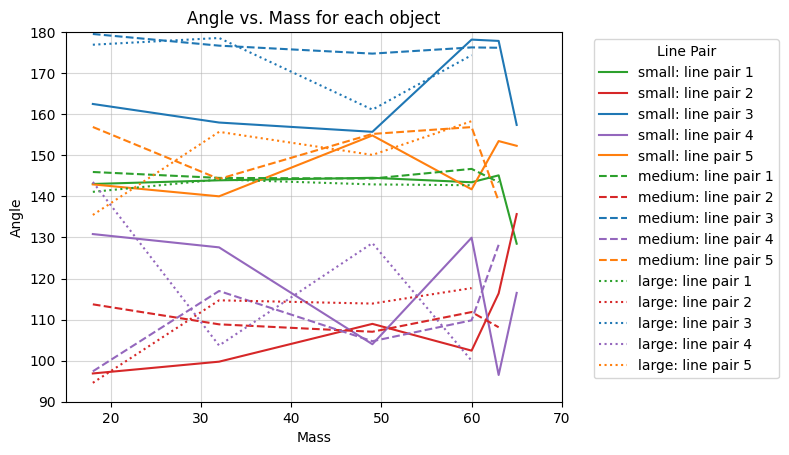

In [8]:
fig, ax = plt.subplots()

def plot_mass_results(data, object):
    ax.set_xlim(15, 70)
    ax.set_ylim(90, 180)
    # for the subset of data where object=='small', plot mass on x axis, angle on y axis, and color code by line pair
    data = data[data['object'] == object]
    colors = {
        'line_pair_1': 'tab:green',
        'line_pair_2': 'tab:red',
        'line_pair_3': 'tab:blue',
        'line_pair_4': 'tab:purple',
        'line_pair_5': 'tab:orange'
    }

    # Set the linestyle for the plot depending on the object with a switch case
    match(object):
        case 'small':
            linestyle = '-'
        case 'medium':
            linestyle = '--'
        case 'large':
            linestyle = ':'

    for line_pair in ['line_pair_1', 'line_pair_2', 'line_pair_3', 'line_pair_4', 'line_pair_5']:
        plt.plot(data['mass'], data[line_pair],
                 label=object + ': ' + ' '.join(line_pair.split('_')), linestyle=linestyle, color=colors[line_pair])
        
    ax.legend(title='Line Pair', bbox_to_anchor=(1.05, 1), loc='upper left')
    

# Set the x-axis and y-axis labels
ax.set_xlabel('Mass')
ax.set_ylabel('Angle')
ax.set_title(f'Angle vs. Mass for each object')
ax.grid(alpha=0.5)

# Add a legend to the plot


for object in ['small', 'medium', 'large']:
    plot_mass_results(mass_results, object)

# Display the plots
plt.show()
